## 📌 Load needed imports and libraries
---

In [2]:
# needed imports

# for loading files
import os

# for handling raw data
import json

# for dataframe manipulations
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# for pre-processing
import re
from ast import literal_eval
from bs4 import BeautifulSoup
from sklearn.preprocessing import MultiLabelBinarizer

## 📌 Load Video Game Data
---

In [3]:
datapath = r'C:\Users\Melzarr\OneDrive\Desktop\THESIS\sp_multilabel_vggtc\data_collection\final_collection\final_data2'

sample_vgdata = datapath + r'\data0_s40856.csv'
vgame0_df = pd.read_csv(sample_vgdata)

In [4]:
vgame0_df.head(5)

,id,name,summary,genre_count,genre_list,genre_ids
0,1,Thief II: The Metal Age,The ultimate thief is back! Tread softly as yo...,3,"['Shooter', 'Simulator', 'Adventure']","[5, 13, 31]"
1,2,Thief: The Dark Project,Thief is a first-person stealth game that like...,2,"['Simulator', 'Adventure']","[13, 31]"
2,3,Thief: Deadly Shadows,"In the third instalment of the Thief series, m...",3,"['Shooter', 'Simulator', 'Adventure']","[5, 13, 31]"
3,4,Thief,There is a rising tide of fear in The City. Ha...,2,"['Shooter', 'Adventure']","[5, 31]"
4,5,Baldur's Gate,Baldur's Gate is a fantasy role-playing video ...,1,['Role-playing (RPG)'],[12]


## 📌 Clean Text Summary  
---
**NOTE**: Cleaning summary text is subject to change. Need further advisement and changes on how to handle this.  
> Addressing these issues: 
> 1. How to handle user-generated text? (yes, IGDB game summary are apparently entered by users!)
> 2. Remove punctuations?

In [5]:
def pre_process(text):
    # fetch alphabetic characters
    text = re.sub("[^a-zA-Z]", " ", text)

    # convert text to lower case
    text = text.lower()

    # split text into tokens to remove whitespaces
    tokens = text.split()

    return " ".join(tokens)

In [6]:
import string
from nltk.corpus import stopwords

def light_cleaning(x):
    # first we lowercase everything
    x = x.lower()
    # remove unicode characters
    x = x.encode('ascii', 'ignore').decode()
    x = re.sub(r'https*\S+', ' ', x)
    x = re.sub(r'http*\S+', ' ', x)
    # then use regex to remove @ symbols and hashtags
    #x = re.sub(r'@\S', '', x)
    #x = re.sub(r'#\S+', ' ', x)
    x = re.sub(r'\'\w+', '', x)
    #x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
    x = re.sub(r'\w*\d+\w*', '', x)
    x = re.sub(r'\s{2,}', ' ', x)
    x = re.sub(r'\s[^\w\s]\s', '', x)
    return x

def heavy_cleaning(x):
    # first we lowercase everything
    x = x.lower()
    x = ' '.join([word for word in x.split(' ') if word not in stopwords])
    # remove unicode characters
    x = x.encode('ascii', 'ignore').decode()
    x = re.sub(r'https*\S+', ' ', x)
    x = re.sub(r'http*\S+', ' ', x)
    # then use regex to remove @ symbols and hashtags
    x = re.sub(r'@\S', '', x)
    x = re.sub(r'#\S+', ' ', x)
    x = re.sub(r'\'\w+', '', x)
    x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
    x = re.sub(r'\w*\d+\w*', '', x)
    x = re.sub(r'\s{2,}', ' ', x)
    x = re.sub(r'\s[^\w\s]\s', '', x)
    # remove single letters and numbers surrounded by space
    x = re.sub(r'\s[a-z]\s|\s[0-9]\s', ' ', x)
    return x

In [7]:
vgame0_df['clean_summary'] = vgame0_df['summary'].apply(light_cleaning)

vgame0_df

,id,name,summary,genre_count,genre_list,genre_ids,clean_summary
0,1,Thief II: The Metal Age,The ultimate thief is back! Tread softly as yo...,3,"['Shooter', 'Simulator', 'Adventure']","[5, 13, 31]",the ultimate thief is back! tread softly as yo...
1,2,Thief: The Dark Project,Thief is a first-person stealth game that like...,2,"['Simulator', 'Adventure']","[13, 31]",thief is a first-person stealth game that like...
2,3,Thief: Deadly Shadows,"In the third instalment of the Thief series, m...",3,"['Shooter', 'Simulator', 'Adventure']","[5, 13, 31]","in the third instalment of the thief series, m..."
3,4,Thief,There is a rising tide of fear in The City. Ha...,2,"['Shooter', 'Adventure']","[5, 31]",there is a rising tide of fear in the city. ha...
4,5,Baldur's Gate,Baldur's Gate is a fantasy role-playing video ...,1,['Role-playing (RPG)'],[12],baldur gate is a fantasy role-playing video ga...
...,...,...,...,...,...,...,...
40851,49994,TNN Outdoors Fishing Champ,"Get out the rod and reel, because the challeng...",1,['Sport'],[14],"get out the rod and reel, because the challeng..."
40852,49995,Tech Deck Skateboarding,Tech Deck Skateboarding challenges you to pull...,1,['Sport'],[14],tech deck skateboarding challenges you to pull...
40853,49997,Qix Adventure,Can you trap the elusive line of energy that's...,1,['Puzzle'],[9],can you trap the elusive line of energy that b...
40854,49998,David O'Leary's Total Soccer 2000,David O'Leary's Total Soccer 2000 is a soccer ...,1,['Sport'],[14],david o total soccer is a soccer game for the ...


## 📌 Turning stringed `genre_list` to Pythonic list
---

In [8]:
vgame0_df['genre_list'] = vgame0_df['genre_list'].apply(literal_eval)
vgame0_df

,id,name,summary,genre_count,genre_list,genre_ids,clean_summary
0,1,Thief II: The Metal Age,The ultimate thief is back! Tread softly as yo...,3,"[Shooter, Simulator, Adventure]","[5, 13, 31]",the ultimate thief is back! tread softly as yo...
1,2,Thief: The Dark Project,Thief is a first-person stealth game that like...,2,"[Simulator, Adventure]","[13, 31]",thief is a first-person stealth game that like...
2,3,Thief: Deadly Shadows,"In the third instalment of the Thief series, m...",3,"[Shooter, Simulator, Adventure]","[5, 13, 31]","in the third instalment of the thief series, m..."
3,4,Thief,There is a rising tide of fear in The City. Ha...,2,"[Shooter, Adventure]","[5, 31]",there is a rising tide of fear in the city. ha...
4,5,Baldur's Gate,Baldur's Gate is a fantasy role-playing video ...,1,[Role-playing (RPG)],[12],baldur gate is a fantasy role-playing video ga...
...,...,...,...,...,...,...,...
40851,49994,TNN Outdoors Fishing Champ,"Get out the rod and reel, because the challeng...",1,[Sport],[14],"get out the rod and reel, because the challeng..."
40852,49995,Tech Deck Skateboarding,Tech Deck Skateboarding challenges you to pull...,1,[Sport],[14],tech deck skateboarding challenges you to pull...
40853,49997,Qix Adventure,Can you trap the elusive line of energy that's...,1,[Puzzle],[9],can you trap the elusive line of energy that b...
40854,49998,David O'Leary's Total Soccer 2000,David O'Leary's Total Soccer 2000 is a soccer ...,1,[Sport],[14],david o total soccer is a soccer game for the ...


## 📌 EDA Proper
---

##### 📝 **Get Word Count of Text Summary**

count    40856.000000
mean        74.705943
std         67.436670
min          1.000000
25%         32.000000
50%         55.000000
75%         98.000000
max       1632.000000
dtype: float64

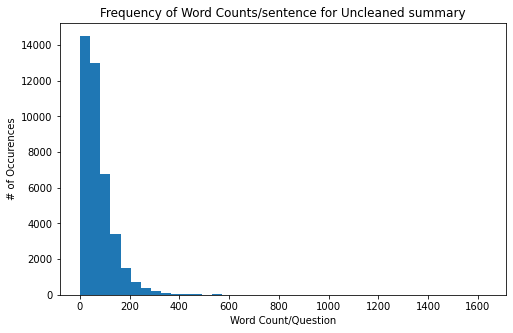

In [9]:
# for unclean text
summary_series = vgame0_df['summary']
word_count = [len(sentence.split()) for sentence in summary_series]

display(pd.Series(word_count).describe())

# Plot the distribution
plt.figure(figsize=[8,5])
plt.hist(word_count, bins = 40)
plt.xlabel('Word Count/Question')
plt.ylabel('# of Occurences')
plt.title("Frequency of Word Counts/sentence for Uncleaned summary")
plt.show()

In [10]:
# get games with clean_summary that is less than 10 words
filtered_summaries = vgame0_df[vgame0_df['clean_summary'].apply(lambda x: len(x.split()) <= 10)]
filtered_summaries.to_csv('filtered_summaries.csv', index=False)
filtered_summaries

,id,name,summary,genre_count,genre_list,genre_ids,clean_summary
104,105,Need for Speed: Hot Pursuit,Become Seacrest County's top cop or most wante...,1,[Racing],[10],become seacrest county top cop or most wanted ...
164,167,Star Wars: TIE Fighter - Defender of the Empire,Defender of the Empire adds 3 new Tours of Duty,1,[Simulator],[13],defender of the empire adds new tours of duty
257,268,Deer Hunter 3D,The Deer Hunter series goes mobile courtesy of...,3,"[Shooter, Simulator, Sport]","[5, 13, 14]",the deer hunter series goes mobile courtesy of...
258,269,Deer Hunter Challenge,Another mobile Deer Hunter.,3,"[Shooter, Simulator, Sport]","[5, 13, 14]",another mobile deer hunter.
607,631,Chessmaster 5500,Chessmaster 5500 is an updated version of Ches...,2,"[Sport, Strategy]","[14, 15]",chessmaster is an updated version of chessmast...
...,...,...,...,...,...,...,...
40672,49773,Oshare Princess,The first game in the Oshare Princess fashion ...,1,[Simulator],[13],the first game in the oshare princess fashion ...
40686,49795,RPG Tsukuru Advance,Game Boy Advance version of RPG Maker.,1,[Role-playing (RPG)],[12],game boy advance version of rpg maker.
40688,49799,Taiketsu! Ultra Hero,Portable fighting fun with Ultraman and company.,1,[Fighting],[4],portable fighting fun with ultraman and company.
40709,49828,Tales of the World: Narikiri Dungeon 2,A crossover Tales series dungeon crawler for GBA.,1,[Role-playing (RPG)],[12],a crossover tales series dungeon crawler for gba.


In [11]:
# filter vgame0_df to only contain clean_summary with more than 10 words
vgame0_df = vgame0_df[vgame0_df['clean_summary'].apply(lambda x: len(x.split()) > 10)].copy().reset_index(drop=True)
vgame0_df

,id,name,summary,genre_count,genre_list,genre_ids,clean_summary
0,1,Thief II: The Metal Age,The ultimate thief is back! Tread softly as yo...,3,"[Shooter, Simulator, Adventure]","[5, 13, 31]",the ultimate thief is back! tread softly as yo...
1,2,Thief: The Dark Project,Thief is a first-person stealth game that like...,2,"[Simulator, Adventure]","[13, 31]",thief is a first-person stealth game that like...
2,3,Thief: Deadly Shadows,"In the third instalment of the Thief series, m...",3,"[Shooter, Simulator, Adventure]","[5, 13, 31]","in the third instalment of the thief series, m..."
3,4,Thief,There is a rising tide of fear in The City. Ha...,2,"[Shooter, Adventure]","[5, 31]",there is a rising tide of fear in the city. ha...
4,5,Baldur's Gate,Baldur's Gate is a fantasy role-playing video ...,1,[Role-playing (RPG)],[12],baldur gate is a fantasy role-playing video ga...
...,...,...,...,...,...,...,...
39293,49993,Tomb Raider: Curse of the Sword,Tomb Raider: Curse of the Sword is a video gam...,1,[Platform],[8],tomb raider: curse of the sword is a video gam...
39294,49994,TNN Outdoors Fishing Champ,"Get out the rod and reel, because the challeng...",1,[Sport],[14],"get out the rod and reel, because the challeng..."
39295,49995,Tech Deck Skateboarding,Tech Deck Skateboarding challenges you to pull...,1,[Sport],[14],tech deck skateboarding challenges you to pull...
39296,49997,Qix Adventure,Can you trap the elusive line of energy that's...,1,[Puzzle],[9],can you trap the elusive line of energy that b...


count    39298.000000
mean        75.607156
std         65.970152
min         11.000000
25%         34.000000
50%         56.000000
75%         98.000000
max       1565.000000
dtype: float64

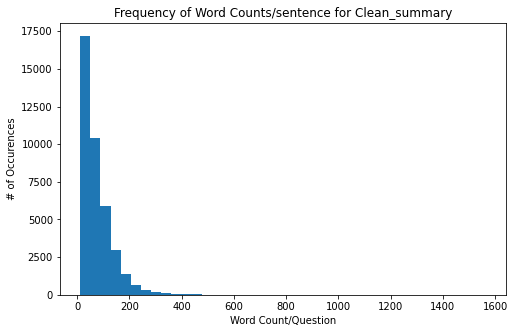

In [12]:
# for clean text
cleansummary_series = vgame0_df['clean_summary']
cleanword_count = [len(sentence.split()) for sentence in cleansummary_series]

display(pd.Series(cleanword_count).describe())

# Plot the distribution
plt.figure(figsize=[8,5])
plt.hist(cleanword_count, bins = 40)
plt.xlabel('Word Count/Question')
plt.ylabel('# of Occurences')
plt.title("Frequency of Word Counts/sentence for Clean_summary")
plt.show()

##### 📝 **Get Genre Type Counts**

<AxesSubplot: title={'center': 'Genre Type Count'}, xlabel='Genre', ylabel='Frequency of Genre'>

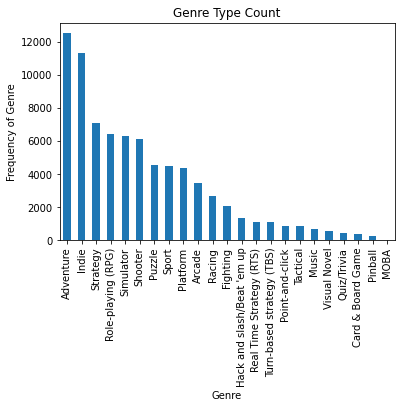

In [13]:
genrelist_copy = vgame0_df['genre_list'].explode('genre_list').reset_index(drop=True)
genretype_count = genrelist_copy.value_counts()
genretype_count

genretype_count.plot(kind='bar', title='Genre Type Count', xlabel='Genre', ylabel='Frequency of Genre')

In [14]:
# update genre_list because they are too many
adventure = ['Adventure', 'Visual Novel', 'Point-and-click']
action = ['Shooter', 'Platform', 'Hack and slash/Beat \'em up', 'Fighting']
arcade = ['Arcade', 'Pinball']
cardboard = ['Card & Board Game']
indie = ['Indie']
puzzle = ['Puzzle', 'Music']
quiz = ['Quiz/Trivia']
rpg = ['Role-playing (RPG)']
simulation = ['Sport', 'Simulator', 'Racing']
strategy = ['Strategy',  'Real Time Strategy (RTS)', 'Tactical', 'Turn-based strategy (TBS)', 'MOBA']

def convert_names(genre_list):
    genrelist_dict ={'adventure': adventure, 'action': action, 'arcade': arcade, 'cardboard': cardboard, 'indie': indie, 
                  'puzzle': puzzle, 'quiz': quiz, 'rpg': rpg, 'simulation': simulation, 'strategy': strategy}
    newlist = []
    
    for key in genrelist_dict:
        if any(genre in genre_list for genre in genrelist_dict[key]):
            newlist.append(key)

    return newlist

def convert_ids(genre_names):
    genreids_dict = {'adventure': 0, 'action': 1, 'arcade': 2, 'cardboard': 3, 'indie': 4, 
                  'puzzle': 5, 'quiz': 6, 'rpg': 7, 'simulation': 8, 'strategy': 9}
    newids = []
    
    for i in genre_names:
        newids.append(genreids_dict[i])
    
    return newids

In [15]:
vgame0_df['new_genrelist'] = vgame0_df['genre_list'].apply(convert_names)
vgame0_df['new_genreids'] = vgame0_df['new_genrelist'].apply(convert_ids)
vgame0_df

,id,name,summary,genre_count,genre_list,genre_ids,clean_summary,new_genrelist,new_genreids
0,1,Thief II: The Metal Age,The ultimate thief is back! Tread softly as yo...,3,"[Shooter, Simulator, Adventure]","[5, 13, 31]",the ultimate thief is back! tread softly as yo...,"[adventure, action, simulation]","[0, 1, 8]"
1,2,Thief: The Dark Project,Thief is a first-person stealth game that like...,2,"[Simulator, Adventure]","[13, 31]",thief is a first-person stealth game that like...,"[adventure, simulation]","[0, 8]"
2,3,Thief: Deadly Shadows,"In the third instalment of the Thief series, m...",3,"[Shooter, Simulator, Adventure]","[5, 13, 31]","in the third instalment of the thief series, m...","[adventure, action, simulation]","[0, 1, 8]"
3,4,Thief,There is a rising tide of fear in The City. Ha...,2,"[Shooter, Adventure]","[5, 31]",there is a rising tide of fear in the city. ha...,"[adventure, action]","[0, 1]"
4,5,Baldur's Gate,Baldur's Gate is a fantasy role-playing video ...,1,[Role-playing (RPG)],[12],baldur gate is a fantasy role-playing video ga...,[rpg],[7]
...,...,...,...,...,...,...,...,...,...
39293,49993,Tomb Raider: Curse of the Sword,Tomb Raider: Curse of the Sword is a video gam...,1,[Platform],[8],tomb raider: curse of the sword is a video gam...,[action],[1]
39294,49994,TNN Outdoors Fishing Champ,"Get out the rod and reel, because the challeng...",1,[Sport],[14],"get out the rod and reel, because the challeng...",[simulation],[8]
39295,49995,Tech Deck Skateboarding,Tech Deck Skateboarding challenges you to pull...,1,[Sport],[14],tech deck skateboarding challenges you to pull...,[simulation],[8]
39296,49997,Qix Adventure,Can you trap the elusive line of energy that's...,1,[Puzzle],[9],can you trap the elusive line of energy that b...,[puzzle],[5]


<AxesSubplot: title={'center': 'Updated Genre Type Count'}, xlabel='Genre', ylabel='Frequency of Genre'>

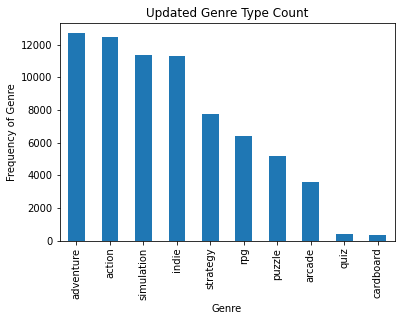

In [16]:
newgenrelist_copy = vgame0_df['new_genrelist'].explode('new_genrelist').reset_index(drop=True)
newgenretype_count = newgenrelist_copy.value_counts()
newgenretype_count

newgenretype_count.plot(kind='bar', title='Updated Genre Type Count', xlabel='Genre', ylabel='Frequency of Genre')

##### 📝 **Get Genre Count Frequency**

1     15682
2     12959
3      6863
4      2739
5       817
6       184
7        39
8        10
9         2
10        2
20        1
Name: genre_count, dtype: int64
39298


<AxesSubplot: title={'center': 'Genre Frequency Count'}, xlabel='# of Genres per Game', ylabel='# of Games'>

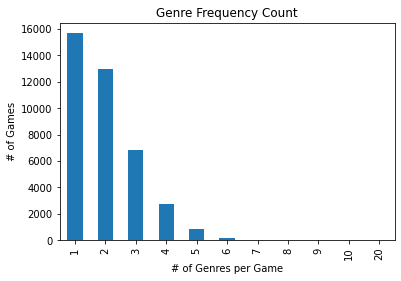

In [17]:
genrecount_freq = pd.value_counts(vgame0_df['genre_count'])
print(genrecount_freq)
print(genrecount_freq.sum())

genrecount_freq.plot(kind='bar', title='Genre Frequency Count', xlabel='# of Genres per Game', ylabel='# of Games')

In [18]:
vgame0_df['new_genrecount'] = vgame0_df['new_genrelist'].str.len()
vgame0_df

,id,name,summary,genre_count,genre_list,genre_ids,clean_summary,new_genrelist,new_genreids,new_genrecount
0,1,Thief II: The Metal Age,The ultimate thief is back! Tread softly as yo...,3,"[Shooter, Simulator, Adventure]","[5, 13, 31]",the ultimate thief is back! tread softly as yo...,"[adventure, action, simulation]","[0, 1, 8]",3
1,2,Thief: The Dark Project,Thief is a first-person stealth game that like...,2,"[Simulator, Adventure]","[13, 31]",thief is a first-person stealth game that like...,"[adventure, simulation]","[0, 8]",2
2,3,Thief: Deadly Shadows,"In the third instalment of the Thief series, m...",3,"[Shooter, Simulator, Adventure]","[5, 13, 31]","in the third instalment of the thief series, m...","[adventure, action, simulation]","[0, 1, 8]",3
3,4,Thief,There is a rising tide of fear in The City. Ha...,2,"[Shooter, Adventure]","[5, 31]",there is a rising tide of fear in the city. ha...,"[adventure, action]","[0, 1]",2
4,5,Baldur's Gate,Baldur's Gate is a fantasy role-playing video ...,1,[Role-playing (RPG)],[12],baldur gate is a fantasy role-playing video ga...,[rpg],[7],1
...,...,...,...,...,...,...,...,...,...,...
39293,49993,Tomb Raider: Curse of the Sword,Tomb Raider: Curse of the Sword is a video gam...,1,[Platform],[8],tomb raider: curse of the sword is a video gam...,[action],[1],1
39294,49994,TNN Outdoors Fishing Champ,"Get out the rod and reel, because the challeng...",1,[Sport],[14],"get out the rod and reel, because the challeng...",[simulation],[8],1
39295,49995,Tech Deck Skateboarding,Tech Deck Skateboarding challenges you to pull...,1,[Sport],[14],tech deck skateboarding challenges you to pull...,[simulation],[8],1
39296,49997,Qix Adventure,Can you trap the elusive line of energy that's...,1,[Puzzle],[9],can you trap the elusive line of energy that b...,[puzzle],[5],1


1    18224
2    12977
3     5650
4     1916
5      456
6       65
7        9
9        1
Name: new_genrecount, dtype: int64
39298


<AxesSubplot: title={'center': 'Updated Genre Frequency Count'}, xlabel='# of Genres per Game', ylabel='# of Games'>

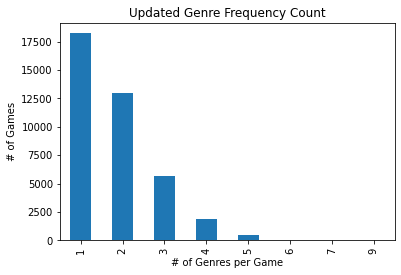

In [19]:
newgenrecount_freq = pd.value_counts(vgame0_df['new_genrecount'])
print(newgenrecount_freq)
print(newgenrecount_freq.sum())

newgenrecount_freq.plot(kind='bar', title='Updated Genre Frequency Count', xlabel='# of Genres per Game', ylabel='# of Games')

## 📌 Multilabel Binarization
---

In [20]:
mlb = MultiLabelBinarizer()
yt = mlb.fit_transform(vgame0_df['new_genrelist'])
yt.shape

(39298, 10)

In [21]:
print(yt[0])
print(mlb.inverse_transform(yt[0].reshape(1,-1)))
print(mlb.classes_)

[1 1 0 0 0 0 0 0 1 0]
[('action', 'adventure', 'simulation')]
['action' 'adventure' 'arcade' 'cardboard' 'indie' 'puzzle' 'quiz' 'rpg'
 'simulation' 'strategy']


In [22]:
yt

array([[1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

## Final Data
---

The text data

In [24]:
vgame0_df[['id','clean_summary']]

,id,clean_summary
0,1,the ultimate thief is back! tread softly as yo...
1,2,thief is a first-person stealth game that like...
2,3,"in the third instalment of the thief series, m..."
3,4,there is a rising tide of fear in the city. ha...
4,5,baldur gate is a fantasy role-playing video ga...
...,...,...
39293,49993,tomb raider: curse of the sword is a video gam...
39294,49994,"get out the rod and reel, because the challeng..."
39295,49995,tech deck skateboarding challenges you to pull...
39296,49997,can you trap the elusive line of energy that b...


The tag data

In [28]:
print(yt)
print(len(yt))

[[1 1 0 ... 0 1 0]
 [0 1 0 ... 0 1 0]
 [1 1 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
39298
